In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [6]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download = True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 41.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.12MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.63MB/s]


In [7]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [12]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [13]:
train_data.targets.shape

torch.Size([60000])

In [14]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [15]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_data, batch_size=100, shuffle=True, num_workers=1),
    'test'  : DataLoader(test_data, batch_size=100, shuffle=True, num_workers=1)
}

In [16]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7d865f9844d0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7d865f987090>}

In [31]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()

    self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
    self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
    self.conv2_drop = nn.Dropout2d()
    self.fc1 = nn.Linear(320, 50)
    self.fc2 = nn.Linear(50, 10)

  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x), 2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)

    return F.softmax(x)

In [36]:
import torch as tc

device = tc.device('cuda' if tc.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(loaders['train']):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 20 == 0:
      print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(loaders['train'].dataset)} ({100. * batch_idx / len(loaders['train']):.0}%)]\t{loss.item():.6f}")


def test():
  model.eval()

  test_loss = 0
  correct = 0

  with tc.no_grad():
    for data, target in loaders['test']:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += loss_fn(output, target).item()
      pred = output.argmax(dim=1, keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(loaders['test'].dataset)
  print(f"\nTest set : Average Loss : {test_loss:.4f}, Accuracy : {correct}/{len(loaders['test'].dataset)} ({100. * correct / len(loaders['test'].dataset):.0f}%\n)")

In [37]:
for epoch in range(1, 11):
  train(epoch)
  test()

<ipython-input-31-f51b4eae5eea>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0e+00%)]	2.302325
Train Epoch: 1 [2000/60000 (3e+00%)]	2.271364
Train Epoch: 1 [4000/60000 (7e+00%)]	2.194888
Train Epoch: 1 [6000/60000 (1e+01%)]	2.004856
Train Epoch: 1 [8000/60000 (1e+01%)]	1.895447
Train Epoch: 1 [10000/60000 (2e+01%)]	1.857925
Train Epoch: 1 [12000/60000 (2e+01%)]	1.827709
Train Epoch: 1 [14000/60000 (2e+01%)]	1.799923
Train Epoch: 1 [16000/60000 (3e+01%)]	1.817845
Train Epoch: 1 [18000/60000 (3e+01%)]	1.842660
Train Epoch: 1 [20000/60000 (3e+01%)]	1.756120
Train Epoch: 1 [22000/60000 (4e+01%)]	1.702504
Train Epoch: 1 [24000/60000 (4e+01%)]	1.684955
Train Epoch: 1 [26000/60000 (4e+01%)]	1.688913
Train Epoch: 1 [28000/60000 (5e+01%)]	1.746581
Train Epoch: 1 [30000/60000 (5e+01%)]	1.688500
Train Epoch: 1 [32000/60000 (5e+01%)]	1.672367
Train Epoch: 1 [34000/60000 (6e+01%)]	1.690626
Train Epoch: 1 [36000/60000 (6e+01%)]	1.643997
Train Epoch: 1 [38000/60000 (6e+01%)]	1.693273
Train Epoch: 1 [40000/60000 (7e+01%)]	1.615440
Train Epoch: 1 [42000

In [38]:
device

device(type='cpu')

Prediction : 7


<ipython-input-31-f51b4eae5eea>:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


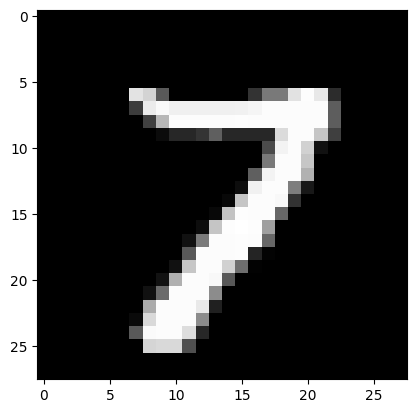

In [78]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[34]

data = data.unsqueeze(0).to(device)

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f"Prediction : {prediction}")

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image, cmap='gray')
plt.show()

In [42]:
model_save_path = 'cnn_mnist.pt'

tc.save(model.state_dict(), model_save_path)

print(f"Model has saved at {model_save_path}")

Model has saved at cnn_mnist.pt


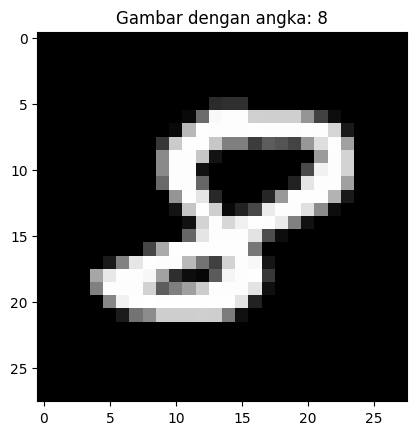

Menampilkan gambar angka 8 pada indeks: 61


In [79]:
# Asumsikan test_data sudah dimuat seperti pada kode sebelumnya

# Buat list kosong untuk menyimpan indeks gambar angka 8
indices_of_eight = []

# Iterasi melalui dataset uji
for i in range(len(test_data)):
  # Ambil data dan target (label) pada indeks saat ini
  data, target = test_data[i]

  # Periksa apakah target (label) adalah 8
  if target == 8:
    # Jika ya, tambahkan indeks ke list
    indices_of_eight.append(i)

# Sekarang list indices_of_eight berisi semua indeks gambar dengan angka 8
# Anda bisa memilih salah satu indeks dari list ini untuk menampilkan gambar

# Contoh: Menampilkan gambar angka 8 pertama yang ditemukan
if len(indices_of_eight) > 0:
  first_eight_index = indices_of_eight[0]
  data_eight, target_eight = test_data[first_eight_index]

  # Kode untuk menampilkan gambar (sama seperti sebelumnya)
  import matplotlib.pyplot as plt
  image_eight = data_eight.squeeze(0).numpy() # Tidak perlu .cpu() jika sudah di CPU
  plt.imshow(image_eight, cmap='gray')
  plt.title(f"Gambar dengan angka: {target_eight}")
  plt.show()
  print(f"Menampilkan gambar angka 8 pada indeks: {first_eight_index}")
else:
  print("Tidak ada gambar dengan angka 8 ditemukan di dataset uji.")

# Anda juga bisa memilih indeks lain dari list indices_of_eight
# misalnya indices_of_eight[10] untuk gambar angka 8 ke-11